# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Marcus Eklund

Vem du har presenterat för: Linus Rundberg Streuli, Melissa Hansson

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [2]:
model = ResNet50(weights='imagenet')

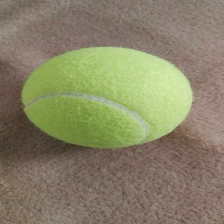

In [3]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 2s 2s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498484e-06), ('n03942813', 'ping-pong_ball', 5.518297e-08)]


# 1. Take some pictures yourself and predict their class.

In [69]:
ls = [x for x in os.listdir('images/') if x.endswith(('.jpg', '.png', '.jpeg', '.webp'))]
img_path_list = ['images/'+x for x in ls]

image_list = []
for img_path in img_path_list:
    img = image.load_img(img_path, target_size=(224, 224))
    image_list.append(img)

images = np.array(image_list)
images.shape

(11, 224, 224, 3)

In [70]:
images = preprocess_input(images)

1/1 [==============================] - 1s 571ms/step
Image #0


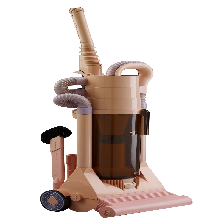

 barrel          - 8.30%
 espresso_maker  - 6.46%
 mortar          - 6.22%

Image #1


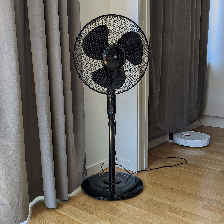

 electric_fan    - 99.97%
 racket          - 0.02%
 gong            - 0.00%

Image #2


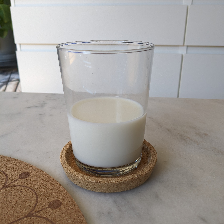

 water_jug       - 14.81%
 measuring_cup   - 12.40%
 beaker          - 12.39%

Image #3


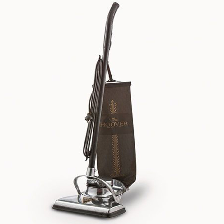

 vacuum          - 71.29%
 mailbag         - 8.74%
 modem           - 4.00%

Image #4


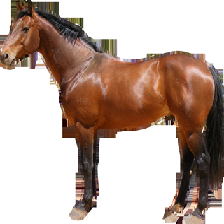

 sorrel          - 99.56%
 hartebeest      - 0.10%
 Arabian_camel   - 0.03%

Image #5


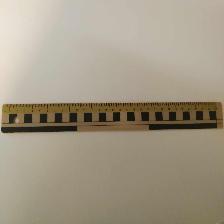

 modem           - 62.94%
 rule            - 13.82%
 harmonica       - 7.48%

Image #6


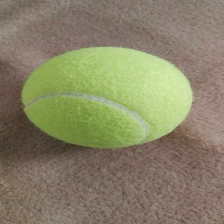

 tennis_ball     - 100.00%
 racket          - 0.00%
 ping-pong_ball  - 0.00%

Image #7


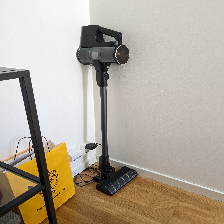

 forklift        - 55.98%
 tripod          - 39.54%
 barbell         - 1.20%

Image #8


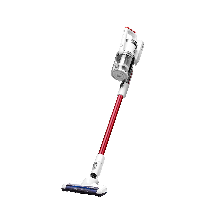

 ski             - 60.44%
 crane           - 31.27%
 swab            - 2.06%

Image #9


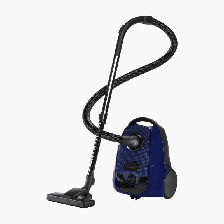

 whistle         - 41.08%
 spotlight       - 6.58%
 stopwatch       - 6.14%

Image #10


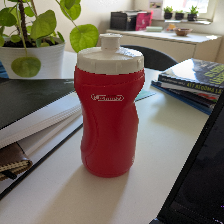

 Christmas_stocking - 29.20%
 water_bottle    - 17.68%
 pop_bottle      - 7.45%



In [71]:
preds = model.predict(images)
# decode the results into a list of tuples (class, description, probability)
top_K = decode_predictions(preds, top=3)

for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    display(image_list[image_index])
    
    for class_id, name, y_proba in top_K[image_index]:
        print(" {:15s} - {:.2f}%".format(name, y_proba * 100))
    
    print()

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Pretrained models are great for when you have problem that is similar to a problem that has already been modeled. You can then use the pretrained model and start to make predictions immediatly instead of haveing to build and train a model from scratch.  
If you have a small dataset, training a model on it might not result in anything usefull but there might be a pretrained model that tackles a similar problem that is trained on a much bigger dataset and generalizes easily to new data.   
The code above is a great example of this where we use a pretrained model trained on ImageNet for recognizing things in pictures and predict what is pictured in photos that the model has never seen before.   